In [1]:
#! pip install hmmlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import itertools
from sklearn.cluster import KMeans
#from hmmlearn import hmm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [2]:
data = pd.read_csv(r'/content/dataset_B_05_2020 (1).csv')
x = data.drop(columns=['url', 'status']).values
y = data.iloc[:, -1].values
y = y.reshape(-1, 1)
encoder = OrdinalEncoder()
# transform data
y = encoder.fit_transform(y)
x = encoder.fit_transform(x)
print(x)
#sc = StandardScaler()
#x = sc.fit_transform(x)
#y = sc.fit(y)

[[ 25.  15.   0. ...   1.   1.   4.]
 [ 65.  19.   1. ...   0.   1.   2.]
 [114.  46.   1. ...   0.   1.   0.]
 ...
 [ 93.  12.   1. ...   0.   1.  10.]
 [ 26.  26.   0. ...   0.   0.   4.]
 [305.  10.   1. ...   1.   1.   0.]]


In [3]:
#This is just to check the linearity percentage of the dataset
regression = LinearRegression().fit(x,y)
print(r2_score(regression.predict(x), y))

0.6448022205256743


In [4]:
svd = TruncatedSVD(n_components=5, algorithm='randomized',
                   random_state=0)
x_svd = svd.fit_transform(x)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_svd, y, test_size=0.3, random_state=2)

In [6]:
#SVM MODEL

model_svm = SVC(random_state=1)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1747
         1.0       0.82      0.84      0.83      1682

    accuracy                           0.83      3429
   macro avg       0.83      0.83      0.83      3429
weighted avg       0.83      0.83      0.83      3429



0.8314377369495479

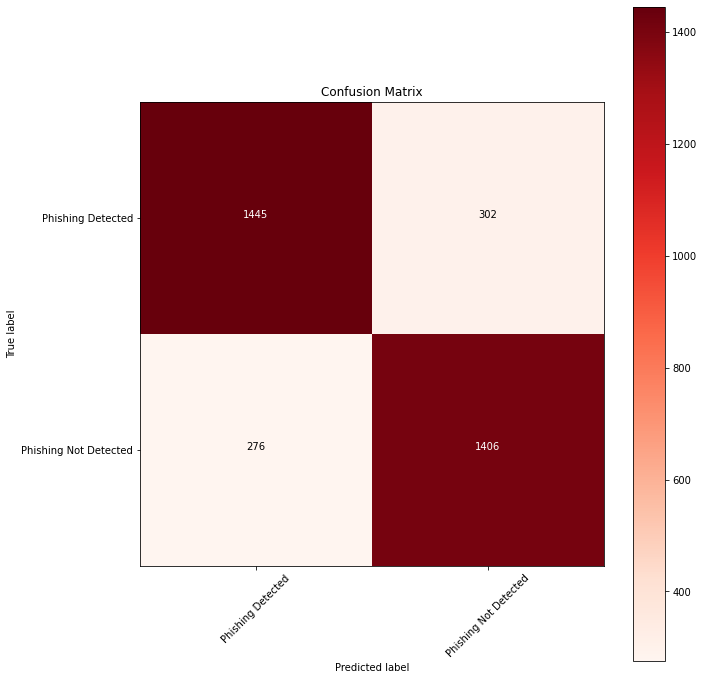

In [7]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_svm)
target_names = ["Phishing Detected", "Phishing Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_svm)

In [8]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
print(classification_report(y_test, y_pred_KNN))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1747
         1.0       0.85      0.87      0.86      1682

    accuracy                           0.86      3429
   macro avg       0.86      0.86      0.86      3429
weighted avg       0.86      0.86      0.86      3429



0.8597258675998833

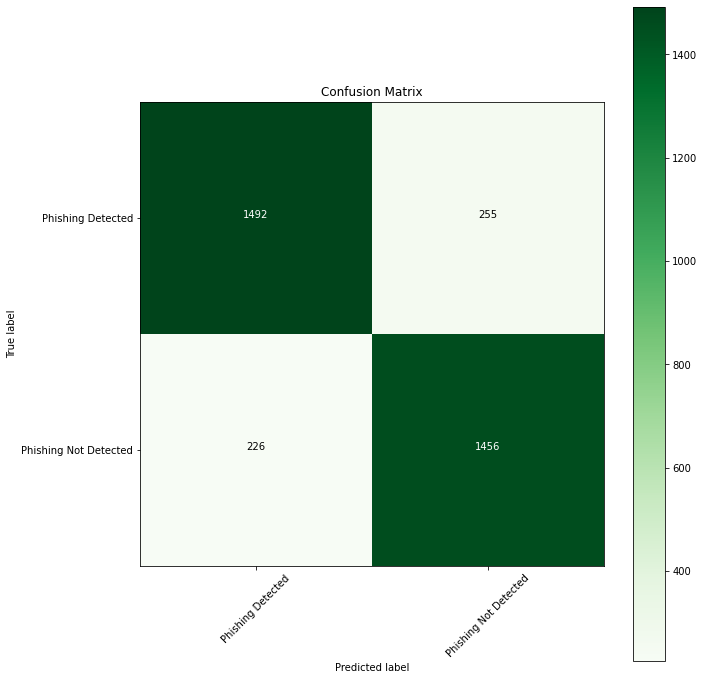

In [9]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_KNN)
target_names = ["Phishing Detected", "Phishing Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_KNN)